<a href="https://colab.research.google.com/github/sswayansidha/ML_Models/blob/main/Implementation/P2_Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Boston House Price Prediction Dataset**
#**Objective: Multiple Linear Regression**
Data_Link: https://www.kaggle.com/schirmerchad/bostonhoustingmlnd

In [13]:
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing.csv


In [56]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded["housing.csv"]))

In [15]:
df.tail()

,RM,LSTAT,PTRATIO,MEDV
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0
488,6.030,7.88,21.0,249900.0


This data frame contains the following columns:

rm : is the average number of rooms among homes in the neighborhood.

lstat : is the percentage of homeowners in the neighborhood considered "lower class" (working poor).

ptratio : is the ratio of students to teachers in primary and secondary schools in the neighborhood.

medv : median value of owner-occupied homes in \$1000s.

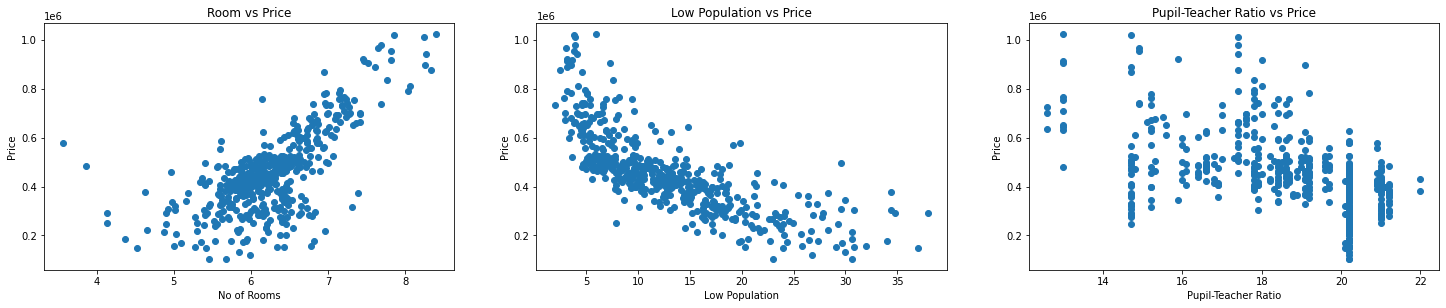

In [44]:
import matplotlib.pyplot as plt

x_RM_list = list(df['RM'])
x_LSTAT_list = list(df['LSTAT'])
x_PTRATIO_list = list(df['PTRATIO'])
y_price_list = list(df['MEDV'])

fig = plt.figure(figsize=(25,10))

plt.subplot(2, 3, 1)
plt.scatter(x_RM_list, y_price_list)
plt.title("Room vs Price")
plt.xlabel('No of Rooms')
plt.ylabel('Price')

plt.subplot(2, 3, 2)
plt.scatter(x_LSTAT_list, y_price_list)
plt.title("Low Population vs Price")
plt.xlabel('Low Population')
plt.ylabel('Price')

plt.subplot(2, 3, 3)
plt.scatter(x_PTRATIO_list, y_price_list)
plt.title("Pupil-Teacher Ratio vs Price")
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Price')

plt.show()

From the above scatterplots it is clear that:

1. RM 
For a higher RM, one would expect to observe a higher MEDV.
This is because more rooms would imply more space, thereby costing more, taking all other factors constant.

2. LSTAT
For a higher LSTAT, one would expect to observe a a lower MEDV.
The social milieux in an area dominated by "lower class" citizens may not be conducive for young children. It may also be relatively unsafe compared to an area dominated by "upper class" citizens. Hence an area with more "lower class" citizens would lower demand, hence lower prices.

3. PTRATIO
For a higher PTRAITO, one would expect to observe a lower MEDV.
This is because there would be a lower teacher-to-student ratio resulting in less attention dedicated to each student that may impair their performance in school. Typically this is the scenario in public/state schools compared to private schools. And the prices of houses around public schools are generally lower than those around private schools. Hence one would expect a lower price given a high student-to-teacher ratio due to a lower demand for houses in such areas.

In [57]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [48]:
x.tail()

,RM,LSTAT,PTRATIO
484,6.593,9.67,21.0
485,6.120,9.08,21.0
486,6.976,5.64,21.0
487,6.794,6.48,21.0
488,6.030,7.88,21.0


In [49]:
y.tail()

484    470400.0
485    432600.0
486    501900.0
487    462000.0
488    249900.0
Name: MEDV, dtype: float64

In [58]:
# Doing a train test split with 20-80 ratio
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=7)

In [59]:
from sklearn.linear_model import LinearRegression # importing Linear Regression
model = LinearRegression() # Model Initialization
model.fit(x_train,y_train) # Fit model to train data

LinearRegression()

In [60]:
prediction = model.predict(x_test) # Predict x_test data

In [61]:
# Performance analysis by R Square
from sklearn.metrics import r2_score
print(r2_score(y_test,prediction))

0.6746664518253247


**Performance is very Poor**